# E-01_ Digits, Wine, Breast_cancer Project  


## (1) 필요한 모듈 import하기  


In [56]:
from sklearn.datasets import load_digits #손글씨 데이터
from sklearn.datasets import load_wine #와인 데이터
from sklearn.datasets import load_breast_cancer #유방암 데이터
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier #결정나무
from sklearn.ensemble import RandomForestClassifier #랜덤포레스트
from sklearn.svm import SVC #SVM (서포트 백터 머신)
from sklearn.linear_model import SGDClassifier #SGD
from sklearn.linear_model import LogisticRegression #LogisticRegression
from sklearn.metrics import classification_report #표현 확인
from sklearn.metrics import confusion_matrix #오차행렬 매트릭스
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# 정확도, 정밀도, 재현율 ,f1_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## (2) 손글씨 데이터 준비  


In [57]:
digits = load_digits()
#dict_keys(['data', 'target', 'frame', 'feature_names', 
#           'target_names', 'images', 'DESCR'])

## (3) 데이터 이해하기  


In [58]:
digits_data = digits.data
digits_label = digits.target
print(digits.target_names) #target_names 출력 [0 1 2 3 4 5 6 7 8 9]
print(digits.DESCR) #데이터 Describe

[0 1 2 3 4 5 6 7 8 9]
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels a

## (4) train, test 데이터 분리  


In [59]:
digits_df = pd.DataFrame(data = digits_data, columns = digits.feature_names)
X_train, X_test, Y_train, Y_test = train_test_split(digits_data,
                                                    digits_label,
                                                    test_size = 0.2,
                                                    random_state = 3)

## (5) 다양한 모델로 학습시켜보기  


### 모델 객체 생성  


In [60]:
decision_tree = DecisionTreeClassifier(random_state = 22)
random_forest = RandomForestClassifier(random_state = 22)
svm = SVC(kernel = 'linear', C = 0.0009)
sgd = SGDClassifier()
logistic = LogisticRegression()

### 모델 학습  


In [61]:
decision_tree.fit(X_train, Y_train)
random_forest.fit(X_train, Y_train)
svm.fit(X_train, Y_train)
sgd.fit(X_train, Y_train)
logistic.fit(X_train, Y_train)

c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### 학습 데이터 예측  


In [62]:
y_pred = decision_tree.predict(X_test)
y_pred_r = random_forest.predict(X_test)
y_pred_v = svm.predict(X_test)
y_pred_s = sgd.predict(X_test)
y_pred_l = logistic.predict(X_test)

### 모델 평가 - 결정나무  


In [63]:
classification = classification_report(Y_test, y_pred)
confusion = confusion_matrix(Y_test, y_pred)
accuracy = accuracy_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred, average = 'macro')
precision = precision_score(Y_test, y_pred, average = 'macro')
fscore = f1_score(Y_test, y_pred, average = 'macro')

### 호출  


In [64]:
print('손글씨(digits) 데이터')

손글씨(digits) 데이터


----------------------------------------------------

In [65]:
# print('결정나무(classification : {0}'.format(classification))
# print(confusion)
print('결정나무(accuracy) : {0:.4f}'.format(accuracy * 100))
#결정나무 : 86.1111

print('결정나무(recall) : {0:.4f}'.format(recall * 100))
#결정나무 : 85.7524

print('결정나무(precision) : {0:.4f}'.format(precision * 100))
#결정나무 : 86.3851

print('결정나무(fscore) : {0:.4f}'.format(fscore * 100))
#결정나무 : 85.7731

결정나무(accuracy) : 86.1111
결정나무(recall) : 85.7524
결정나무(precision) : 86.3851
결정나무(fscore) : 85.7731


----------------------------------------------------

### 모델 평가 - 랜덤포레스트  


In [66]:
classification_r = classification_report(Y_test, y_pred_r)
confusion_r = confusion_matrix(Y_test, y_pred_r)
accuracy_r = accuracy_score(Y_test, y_pred_r)
recall_r = recall_score(Y_test, y_pred_r, average = 'macro')
precision_r = precision_score(Y_test, y_pred_r, average = 'macro')
fscore_r = f1_score(Y_test, y_pred_r, average = 'macro')

### 호출  


In [67]:
# print('랜덤포레스트(classification : {0}'.format(classification_r))
print('랜덤포레스트(accuracy) : {0:.4f}'.format(accuracy_r * 100))
# #랜덤포레스트 : 97.2222

print('랜덤포레스트(recall) : {0:.4f}'.format(recall_r * 100))
#랜덤포레스트 : 97.0847

print('랜덤포레스트(precision) : {0:.4f}'.format(precision_r * 100))
#랜덤포레스트 : 97.1908

print('랜덤포레스트(fscore) : {0:.4f}'.format(fscore_r * 100))
#랜덤포레스트 : 97.0681

랜덤포레스트(accuracy) : 97.2222
랜덤포레스트(recall) : 97.0847
랜덤포레스트(precision) : 97.1908
랜덤포레스트(fscore) : 97.0681


----------------------------------------------------

### 모델 평가 - SVM  


In [68]:
classification_v = classification_report(Y_test, y_pred_v)
confusion_v = confusion_matrix(Y_test, y_pred_v)
accuracy_v = accuracy_score(Y_test, y_pred_v)
recall_v = recall_score(Y_test, y_pred_v, average = 'macro')
precision_v = precision_score(Y_test, y_pred_v, average = 'macro')
fscore_v = f1_score(Y_test, y_pred_v, average = 'macro')

### 호출  


In [69]:
# print('SVM(classification : {0}'.format(classification_r))
print('SVM(accuracy) : {0:.4f}'.format(accuracy_v * 100))
# #SVM : 98.6111

print('SVM(recall) : {0:.4f}'.format(recall_v * 100))
#SVM : 98.5818

print('SVM(precision) : {0:.4f}'.format(precision_v * 100))
#SVM : 98.4758

print('SVM(fscore) : {0:.4f}'.format(fscore_v * 100))
#SVM : 98.5247

SVM(accuracy) : 98.6111
SVM(recall) : 98.5818
SVM(precision) : 98.4758
SVM(fscore) : 98.5247


----------------------------------------------------

### 모델 평가 - SGD  


SGD의 결과값이 매번 바뀌는 이유:  
-> 손실함수가 최솟값(=원하는 정제된 데이터)으로 갈때까지 불안정하게 움직이다보니  
최적해(=최적화 데이터)에 도달하지 못할수도 있음  
(지역 최솟값으론 빠르게 도달 가능하나, 전역 최솟값에는 다다르기 힘들 수 있음)  


In [70]:
classification_s = classification_report(Y_test, y_pred_s)
confusion_s = confusion_matrix(Y_test, y_pred_s)
accuracy_s = accuracy_score(Y_test, y_pred_s)
recall_s = recall_score(Y_test, y_pred_s, average = 'macro')
precision_s = precision_score(Y_test, y_pred_s, average = 'macro')
fscore_s = f1_score(Y_test, y_pred_s, average = 'macro')

### 호출  


In [71]:
# print('SGD(classification : {0}'.format(classification_s))
print('SGD(accuracy) : {0:.4f}'.format(accuracy_s * 100))
# #SGD : 92.7778

print('SGD(recall) : {0:.4f}'.format(recall_s * 100))
# #SGD : 92.5416

print('SGD(precision) : {0:.4f}'.format(precision_s * 100))
# #SGD : 92.8448

print('SGD(fscore) : {0:.4f}'.format(fscore_s * 100))
# #SGD : 92.4182

SGD(accuracy) : 95.2778
SGD(recall) : 95.1385
SGD(precision) : 95.1446
SGD(fscore) : 94.9733


----------------------------------------------------

### 모델 평가 - Logistic  


In [72]:
classification_l = classification_report(Y_test, y_pred_l)
confusion_l = confusion_matrix(Y_test, y_pred_l)
accuracy_l = accuracy_score(Y_test, y_pred_l)
recall_l = recall_score(Y_test, y_pred_l, average = 'macro')
precision_l = precision_score(Y_test, y_pred_l, average = 'macro')
fscore_l = f1_score(Y_test, y_pred_l, average = 'macro')

### 호출  


In [73]:
# print('Logistic(classification : {0}'.format(classification_l))
print('Logistic(accuracy) : {0:.4f}'.format(accuracy_l * 100))
# #logistic : 95.2778

print('Logistic(recall) : {0:.4f}'.format(recall_l * 100))
# #logistic : 95.1185

print('Logistic(precision) : {0:.4f}'.format(precision_l * 100))
# #logistic : 94.9670

print('Logistic(fscore) : {0:.4f}'.format(fscore_l * 100))
# #logistic : 94.9550

Logistic(accuracy) : 95.2778
Logistic(recall) : 95.1185
Logistic(precision) : 94.9670
Logistic(fscore) : 94.9550


----------------------------------------------------

### 시각화  


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10664\1799669881.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(e_x, e_v_r, 'bo-', color = 'green', label = 'Recall')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10664\1799669881.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(e_x, e_v_s, 'bo-', color = 'y', label = 'Precision')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10664\1799669881.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(e_x, e_v_l, 'bo-', color = 'red', label = 'F1_Score')


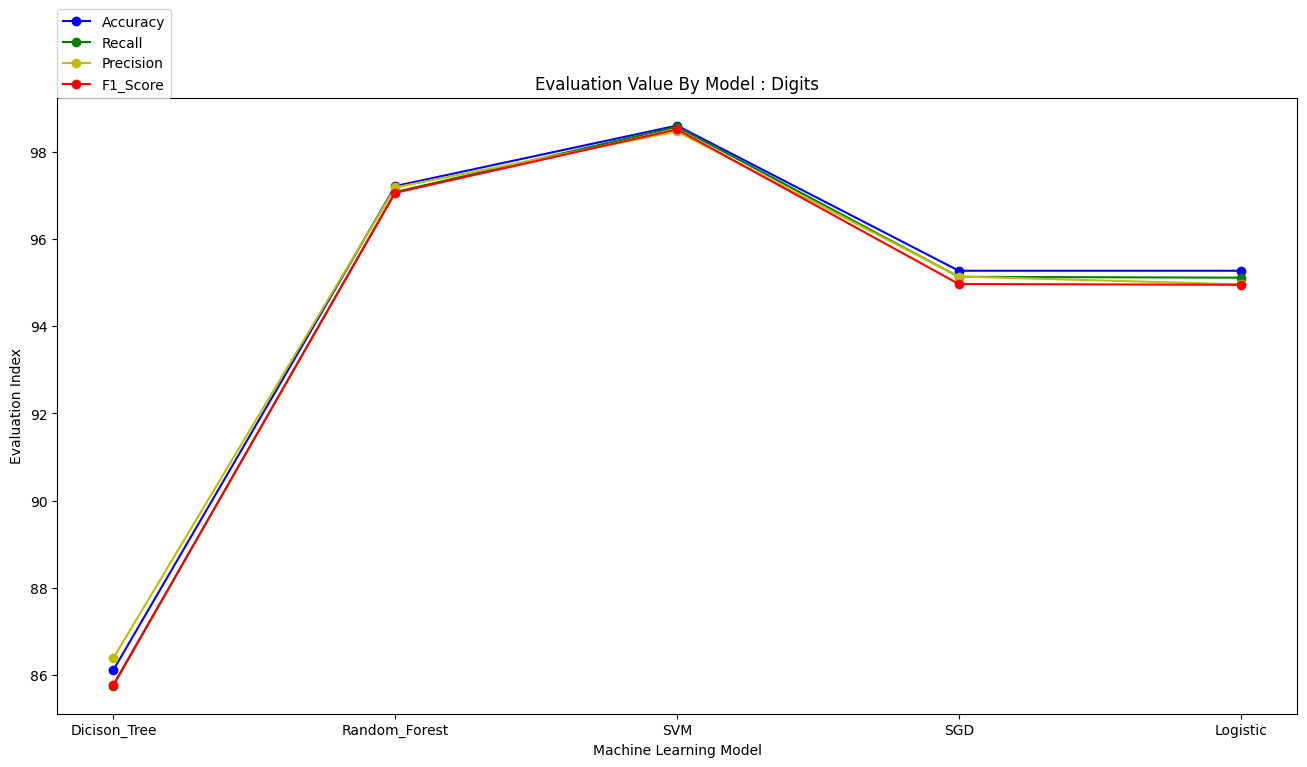

In [74]:
e_x = ['Dicison_Tree', 'Random_Forest', 'SVM', 'SGD', 'Logistic']
e_v = [accuracy * 100, accuracy_r * 100, accuracy_v * 100, accuracy_s * 100, accuracy_l * 100]
e_v_r = [recall * 100, recall_r * 100, recall_v * 100, recall_s * 100, recall_l * 100]
e_v_s = [precision * 100, precision_r * 100, precision_v * 100, precision_s * 100, precision_l * 100]
e_v_l = [fscore * 100, fscore_r * 100, fscore_v * 100, fscore_s * 100, fscore_l * 100]

plt.figure(figsize = (16, 8))
plt.plot(e_x, e_v, 'bo-', label = 'Accuracy')
plt.plot(e_x, e_v_r, 'bo-', color = 'green', label = 'Recall')
plt.plot(e_x, e_v_s, 'bo-', color = 'y', label = 'Precision')
plt.plot(e_x, e_v_l, 'bo-', color = 'red', label = 'F1_Score')
plt.title('Evaluation Value By Model : Digits')
plt.xlabel('Machine Learning Model')
plt.ylabel('Evaluation Index')
plt.legend(loc = (0, 1.0))
plt.show()

### 모델을 평가 해보기  


분류모델 평가지표로 accuracy, precision, recall, f1-score 를 사용했으며  
classification 을 이용하여 4가지의 지표를 한번에 확인할 순 있었으나  
세분화해서 좀더 정확한 지표를 보고 싶었으며 시각화를 통해 어떠한 차이가 있는지를 나타내고 싶었습니다.  
  
accuracy 평가지표는 해당 모델이 얼마나 숫자에 대해서 정확하게 판별하는지 알아보고 싶었고  
(해당 숫자가 맞다, 아니다를 정확하게 판별 구분)  
  
recall 평가지표는 전부 맞다고 했을때 정말로 맞았는지를 확인하는 평균값  
  
precision 평가지표는 맞다 아니다를 예측했을때 맞혔을때의 평균값  
  
f1-score 평가지표는 recall 과 precision 의 교집합의 평균이 얼마나 되는지를 보고 싶었습니다.  
  
그래서 이렇게 4가지의 평가지표를 시각화하여 비교해보고 해당 모델은 어떠한 데이터상황에서 쓰면  
더 정확하게 사용할 수 있구나를 직접적으로 보고 싶었습니다.  
(4가지의 분류모델에서 평균적으로 accuracy 의 평균 평가값이 가장 높게 나왔습니다.  
이것을 보고 제가 알 수 있었던 사실은 Feature 데이터와 Target 데이터가  
분명하게 나뉘어져 accuracy 평가지표가 가장 적합하기도 했으며,  
손글씨분류 데이터는 데이터가 불균형한 값으로 이루어진 데이터가 아니었음을 알 수 있었습니다.  
[애시당초 숫자 1은 1이고 2는 2인 상황에서 데이터가 불균형한 값으로 있을 수가 없었다고 생각합니다.])  
  
  
정확도 : 예측이 정답과 얼마나 정확한가?  
정밀도 : 예측한 것중에 정답의 비율은?  
재현율 : 찾아야 할 것중에 실제로 찾은 비율은?  
[F1 Score : 정밀도와 재현율의 평균](https://sumniya.tistory.com/26)  
  


## (2) 와인 데이터 준비  


In [75]:
wine = load_wine()
#dict_keys(['data', 'target', 'frame', 'target_names', 
#           'DESCR', 'feature_names'])

## (3) 데이터 이해하기  


In [76]:
wine_data = wine.data
wine_label = wine.target
print(wine.target_names) #target_names 출력 ['class_0' 'class_1' 'class_2']
print(wine.DESCR) #데이터 Describe

['class_0' 'class_1' 'class_2']
.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:           

## (4) train, test 데이터 분리  


In [77]:
wine_df = pd.DataFrame(data = wine_data, columns = wine.feature_names)
X_train, X_test, Y_train, Y_test = train_test_split(wine_data,
                                                    wine_label,
                                                    test_size = 0.2,
                                                    random_state = 7)

## (5) 다양한 모델로 학습시켜보기  


### 모델 객체 생성  


In [78]:
decision_tree = DecisionTreeClassifier(random_state = 10)
random_forest = RandomForestClassifier(random_state = 10)
svm = SVC(kernel = 'linear', C = 0.05)
sgd = SGDClassifier() 
# 이 분류모델의 파라미터값을 변경해가며 모델 성능을 끌어 올려보고 싶었으나...  
# 아직은.. 이해가 안가는 부분이 많아 파라미터값은 비워둡니다.  
logistic = LogisticRegression()

### 모델 학습  


In [79]:
decision_tree.fit(X_train, Y_train)
random_forest.fit(X_train, Y_train)
svm.fit(X_train, Y_train)
sgd.fit(X_train, Y_train)
logistic.fit(X_train, Y_train)

c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### 학습 데이터 예측  


In [80]:
y_pred = decision_tree.predict(X_test)
y_pred_r = random_forest.predict(X_test)
y_pred_v = svm.predict(X_test)
y_pred_s = sgd.predict(X_test)
y_pred_l = logistic.predict(X_test)

### 모델 평가 - 결정나무  


In [81]:
classification = classification_report(Y_test, y_pred)
confusion = confusion_matrix(Y_test, y_pred)
accuracy = accuracy_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred, average = 'macro')
precision = precision_score(Y_test, y_pred, average = 'macro')
fscore = f1_score(Y_test, y_pred, average = 'macro')

### 호출  


In [82]:
print('와인분류(wine) 데이터')

와인분류(wine) 데이터


----------------------------------------------------

In [83]:
# print('결정나무(classification : {0}'.format(classification))
# print(confusion)
print('결정나무(accuracy) : {0:.4f}'.format(accuracy * 100))
#결정나무 : 94.4444

print('결정나무(recall) : {0:.4f}'.format(recall * 100))
#결정나무 : 94.4444

print('결정나무(precision) : {0:.4f}'.format(precision * 100))
#결정나무 : 93.9815

print('결정나무(fscore) : {0:.4f}'.format(fscore * 100))
#결정나무 : 93.7951

결정나무(accuracy) : 94.4444
결정나무(recall) : 94.4444
결정나무(precision) : 93.9815
결정나무(fscore) : 93.7951


----------------------------------------------------

### 모델 평가 - 랜덤포레스트  


In [84]:
classification_r = classification_report(Y_test, y_pred_r)
confusion_r = confusion_matrix(Y_test, y_pred_r)
accuracy_r = accuracy_score(Y_test, y_pred_r)
recall_r = recall_score(Y_test, y_pred_r, average = 'macro')
precision_r = precision_score(Y_test, y_pred_r, average = 'macro')
fscore_r = f1_score(Y_test, y_pred_r, average = 'macro')

### 호출  


In [85]:
# print('랜덤포레스트(classification : {0}'.format(classification_r))
print('랜덤포레스트(accuracy) : {0:.4f}'.format(accuracy_r * 100))
# #랜덤포레스트 : 100.0000

print('랜덤포레스트(recall) : {0:.4f}'.format(recall_r * 100))
#랜덤포레스트 : 100.0000

print('랜덤포레스트(precision) : {0:.4f}'.format(precision_r * 100))
#랜덤포레스트 : 100.0000

print('랜덤포레스트(fscore) : {0:.4f}'.format(fscore_r * 100))
#랜덤포레스트 : 100.0000

랜덤포레스트(accuracy) : 100.0000
랜덤포레스트(recall) : 100.0000
랜덤포레스트(precision) : 100.0000
랜덤포레스트(fscore) : 100.0000


----------------------------------------------------

### 모델 평가 - SVM  


In [86]:
classification_v = classification_report(Y_test, y_pred_v)
confusion_v = confusion_matrix(Y_test, y_pred_v)
accuracy_v = accuracy_score(Y_test, y_pred_v)
recall_v = recall_score(Y_test, y_pred_v, average = 'macro')
precision_v = precision_score(Y_test, y_pred_v, average = 'macro')
fscore_v = f1_score(Y_test, y_pred_v, average = 'macro')

### 호출  


In [87]:
# print('SVM(classification : {0}'.format(classification_r))
print('SVM(accuracy) : {0:.4f}'.format(accuracy_v * 100))
# #SVM : 100.0000

print('SVM(recall) : {0:.4f}'.format(recall_v * 100))
#SVM : 100.0000

print('SVM(precision) : {0:.4f}'.format(precision_v * 100))
#SVM : 100.0000

print('SVM(fscore) : {0:.4f}'.format(fscore_v * 100))
#SVM : 100.0000

SVM(accuracy) : 100.0000
SVM(recall) : 100.0000
SVM(precision) : 100.0000
SVM(fscore) : 100.0000


----------------------------------------------------

### 모델 평가 - SGD  


SGD의 결과값이 매번 바뀌는 이유:  
-> 손실함수가 최솟값(=원하는 정제된 데이터)으로 갈때까지 불안정하게 움직이다보니  
최적해(=최적화 데이터)에 도달하지 못할수도 있음  
(지역 최솟값으론 빠르게 도달 가능하나, 전역 최솟값에는 다다르기 힘들 수 있음)  


In [88]:
classification_s = classification_report(Y_test, y_pred_s)
confusion_s = confusion_matrix(Y_test, y_pred_s)
accuracy_s = accuracy_score(Y_test, y_pred_s)
recall_s = recall_score(Y_test, y_pred_s, average = 'macro')
precision_s = precision_score(Y_test, y_pred_s, average = 'macro')
fscore_s = f1_score(Y_test, y_pred_s, average = 'macro')

### 호출

In [89]:
# print('SGD(classification : {0}'.format(classification_s))
print('SGD(accuracy) : {0:.4f}'.format(accuracy_s * 100))
# #SGD : 61.1111

print('SGD(recall) : {0:.4f}'.format(recall_s * 100))
# #SGD : 57.7264

print('SGD(precision) : {0:.4f}'.format(precision_s * 100))
# #SGD : 78.6111

print('SGD(fscore) : {0:.4f}'.format(fscore_s * 100))
# #SGD : 57.4074

SGD(accuracy) : 55.5556
SGD(recall) : 66.1765
SGD(precision) : 64.2857
SGD(fscore) : 57.7540


----------------------------------------------------

### 모델 평가 - Logistic  


In [90]:
classification_l = classification_report(Y_test, y_pred_l)
confusion_l = confusion_matrix(Y_test, y_pred_l)
accuracy_l = accuracy_score(Y_test, y_pred_l)
recall_l = recall_score(Y_test, y_pred_l, average = 'macro')
precision_l = precision_score(Y_test, y_pred_l, average = 'macro')
fscore_l = f1_score(Y_test, y_pred_l, average = 'macro')

### 호출

In [91]:
# print('Logistic(classification : {0}'.format(classification_l))
print('Logistic(accuracy) : {0:.4f}'.format(accuracy_l * 100))
# #logistic : 97.2222

print('Logistic(recall) : {0:.4f}'.format(recall_l * 100))
# #logistic : 95.2381

print('Logistic(precision) : {0:.4f}'.format(precision_l * 100))
# #logistic : 98.1481

print('Logistic(fscore) : {0:.4f}'.format(fscore_l * 100))
# #logistic : 96.4835

Logistic(accuracy) : 97.2222
Logistic(recall) : 95.2381
Logistic(precision) : 98.1481
Logistic(fscore) : 96.4835


----------------------------------------------------

### 시각화

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10664\3540607495.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(e_x, e_v_r, 'bo-', color = 'green', label = 'Recall')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10664\3540607495.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(e_x, e_v_s, 'bo-', color = 'y', label = 'Precision')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10664\3540607495.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(e_x, e_v_l, 'bo-', color = 'red', label = 'F1_Score')


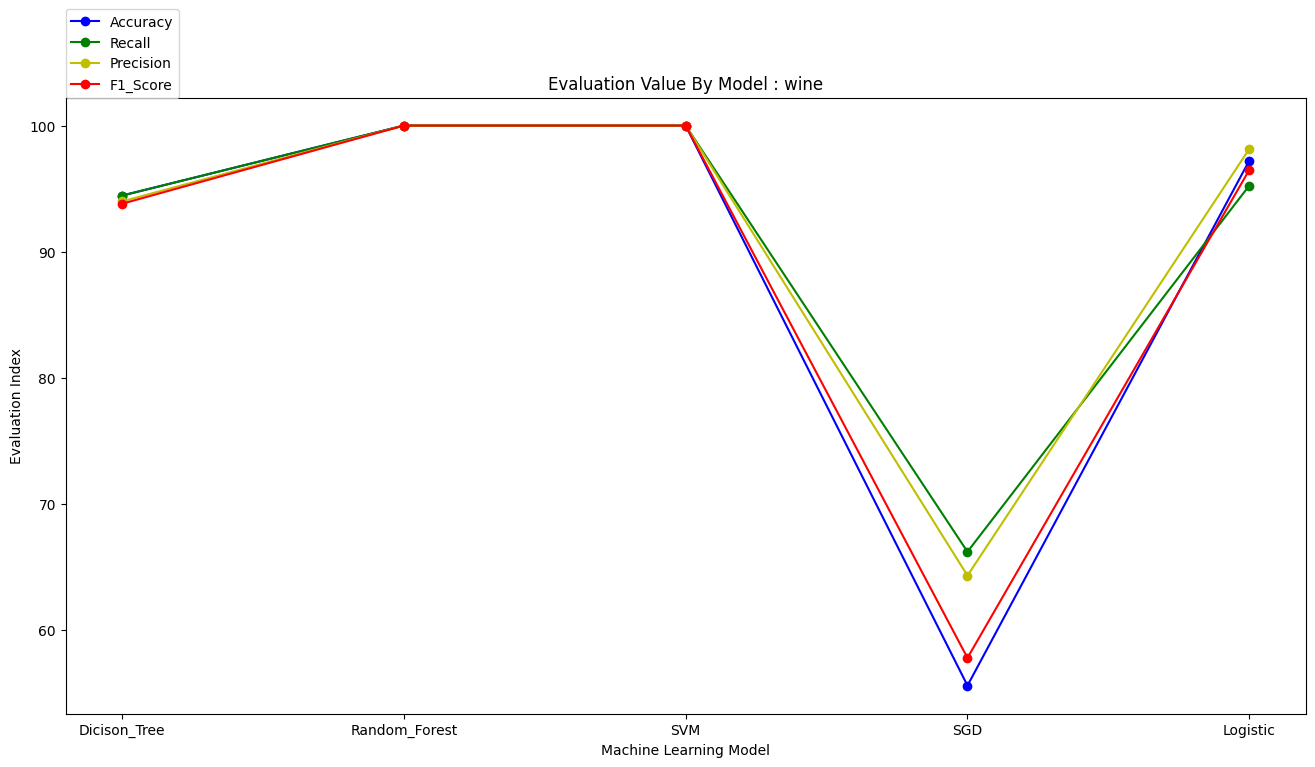

In [92]:
e_x = ['Dicison_Tree', 'Random_Forest', 'SVM', 'SGD', 'Logistic']
e_v = [accuracy * 100, accuracy_r * 100, accuracy_v * 100, accuracy_s * 100, accuracy_l * 100]
e_v_r = [recall * 100, recall_r * 100, recall_v * 100, recall_s * 100, recall_l * 100]
e_v_s = [precision * 100, precision_r * 100, precision_v * 100, precision_s * 100, precision_l * 100]
e_v_l = [fscore * 100, fscore_r * 100, fscore_v * 100, fscore_s * 100, fscore_l * 100]

plt.figure(figsize = (16, 8))
plt.plot(e_x, e_v, 'bo-', label = 'Accuracy')
plt.plot(e_x, e_v_r, 'bo-', color = 'green', label = 'Recall')
plt.plot(e_x, e_v_s, 'bo-', color = 'y', label = 'Precision')
plt.plot(e_x, e_v_l, 'bo-', color = 'red', label = 'F1_Score')
plt.title('Evaluation Value By Model : wine')
plt.xlabel('Machine Learning Model')
plt.ylabel('Evaluation Index')
plt.legend(loc = (0, 1.0))
plt.show()

## (6) 모델을 평가해 보기  


개인적으로... 데이터의 평가는 precision 을 기준으로 모델을 평가해야한다고 생각했습니다.  
(와인을 분류한다는것은 100퍼센트의 정답지로 평가하는것보다(accuracy) 예측한 것중에 찾은 비율을 보는것이  
더 데이터를 잘 활용할 수 있다고 생각하여 precision 을 기준으로 평가)  
그러하여 precision 의 평가값이 더 잘 나올 수 있게 모델별 파라미터를 수정했었어야 했으나  
모델별 파라미터의 내용에 대해서 아직까지 이해하질 못하고 있으며 이 부분에 대해선 현재의 프로젝트에  
랜덤으로 아무거나 집어넣으며 적용시키는것이 아닌 좀더 공부하여 어떻게 사용되는지에 대해서  
정확하게 알고난 뒤 사용을 해야겠다하여 파라미터값을 수정하질 않았습니다.  
  
  
정확도 : 예측이 정답과 얼마나 정확한가?  
정밀도 : 예측한 것중에 정답의 비율은?  
재현율 : 찾아야 할 것중에 실제로 찾은 비율은?  
[F1 Score : 정밀도와 재현율의 평균](https://sumniya.tistory.com/26)  
  


## (2) 유방암 데이터 준비  


In [93]:
breast_cancer = load_breast_cancer()
#dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 
#           'filename', 'data_module'])

## (3) 데이터 이해하기  


In [94]:
breast_cancer_data = breast_cancer.data
breast_cancer_label = breast_cancer.target
print(breast_cancer.target_names) #target_names 출력 ['malignant' 'benign']
print(breast_cancer.DESCR) #데이터 Describe

['malignant' 'benign']
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instanc

## (4) train, test 데이터 분리  


In [95]:
breast_cancer_df = pd.DataFrame(data = breast_cancer_data, columns = breast_cancer.feature_names)
X_train, X_test, Y_train, Y_test = train_test_split(breast_cancer_data,
                                                    breast_cancer_label,
                                                    test_size = 0.2,
                                                    random_state = 15)

## (5) 다양한 모델로 학습시켜보기  


### 모델 객체 생성  


In [96]:
decision_tree = DecisionTreeClassifier(random_state = 13)
random_forest = RandomForestClassifier(random_state = 13)
svm = SVC(kernel = 'linear', C = 0.00005)
sgd = SGDClassifier() 
# 이 분류모델의 파라미터값을 변경해가며 모델 성능을 끌어 올려보고 싶었으나...  
# 아직은.. 이해가 안가는 부분이 많아 파라미터값은 비워둡니다.  
logistic = LogisticRegression()

### 모델 학습  


In [97]:
decision_tree.fit(X_train, Y_train)
random_forest.fit(X_train, Y_train)
svm.fit(X_train, Y_train)
sgd.fit(X_train, Y_train)
logistic.fit(X_train, Y_train)

c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### 학습 데이터 예측  


In [98]:
y_pred = decision_tree.predict(X_test)
y_pred_r = random_forest.predict(X_test)
y_pred_v = svm.predict(X_test)
y_pred_s = sgd.predict(X_test)
y_pred_l = logistic.predict(X_test)

### 모델 평가 - 결정나무  


In [99]:
classification = classification_report(Y_test, y_pred)
confusion = confusion_matrix(Y_test, y_pred)
accuracy = accuracy_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred, average = 'macro')
precision = precision_score(Y_test, y_pred, average = 'macro')
fscore = f1_score(Y_test, y_pred, average = 'macro')

### 호출  


In [100]:
print('유방암 여부(breast_cancer) 데이터')

유방암 여부(breast_cancer) 데이터


----------------------------------------------------

In [101]:
# print('결정나무(classification : {0}'.format(classification))
# print(confusion)
print('결정나무(accuracy) : {0:.4f}'.format(accuracy * 100))
#결정나무 : 93.8596

print('결정나무(recall) : {0:.4f}'.format(recall * 100))
#결정나무 : 92.2564

print('결정나무(precision) : {0:.4f}'.format(precision * 100))
#결정나무 : 94.0171

print('결정나무(fscore) : {0:.4f}'.format(fscore * 100))
#결정나무 : 93.0458

결정나무(accuracy) : 93.8596
결정나무(recall) : 92.2564
결정나무(precision) : 94.0171
결정나무(fscore) : 93.0458


----------------------------------------------------

### 모델 평가 - 랜덤포레스트  


In [102]:
classification_r = classification_report(Y_test, y_pred_r)
confusion_r = confusion_matrix(Y_test, y_pred_r)
accuracy_r = accuracy_score(Y_test, y_pred_r)
recall_r = recall_score(Y_test, y_pred_r, average = 'macro')
precision_r = precision_score(Y_test, y_pred_r, average = 'macro')
fscore_r = f1_score(Y_test, y_pred_r, average = 'macro')

### 호출  


In [103]:
# print('랜덤포레스트(classification : {0}'.format(classification_r))
print('랜덤포레스트(accuracy) : {0:.4f}'.format(accuracy_r * 100))
# #랜덤포레스트 : 92.1053

print('랜덤포레스트(recall) : {0:.4f}'.format(recall_r * 100))
#랜덤포레스트 : 90.3077

print('랜덤포레스트(precision) : {0:.4f}'.format(precision_r * 100))
#랜덤포레스트 : 91.9872

print('랜덤포레스트(fscore) : {0:.4f}'.format(fscore_r * 100))
#랜덤포레스트 : 91.0588

랜덤포레스트(accuracy) : 92.1053
랜덤포레스트(recall) : 90.3077
랜덤포레스트(precision) : 91.9872
랜덤포레스트(fscore) : 91.0588


----------------------------------------------------

### 모델 평가 - SVM  


In [104]:
classification_v = classification_report(Y_test, y_pred_v)
confusion_v = confusion_matrix(Y_test, y_pred_v)
accuracy_v = accuracy_score(Y_test, y_pred_v)
recall_v = recall_score(Y_test, y_pred_v, average = 'macro')
precision_v = precision_score(Y_test, y_pred_v, average = 'macro')
fscore_v = f1_score(Y_test, y_pred_v, average = 'macro')

### 호출  


In [105]:
# print('SVM(classification : {0}'.format(classification_r))
print('SVM(accuracy) : {0:.4f}'.format(accuracy_v * 100))
# #SVM : 89.4737

print('SVM(recall) : {0:.4f}'.format(recall_v * 100))
#SVM : 88.3077

print('SVM(precision) : {0:.4f}'.format(precision_v * 100))
#SVM : 88.3077

print('SVM(fscore) : {0:.4f}'.format(fscore_v * 100))
#SVM : 88.3077

SVM(accuracy) : 90.3509
SVM(recall) : 88.3590
SVM(precision) : 89.9573
SVM(fscore) : 89.0719


----------------------------------------------------

### 모델 평가 - SGD  


SGD의 결과값이 매번 바뀌는 이유:  
-> 손실함수가 최솟값(=원하는 정제된 데이터)으로 갈때까지 불안정하게 움직이다보니  
최적해(=최적화 데이터)에 도달하지 못할수도 있음  
(지역 최솟값으론 빠르게 도달 가능하나, 전역 최솟값에는 다다르기 힘들 수 있음)  


In [106]:
classification_s = classification_report(Y_test, y_pred_s)
confusion_s = confusion_matrix(Y_test, y_pred_s)
accuracy_s = accuracy_score(Y_test, y_pred_s)
recall_s = recall_score(Y_test, y_pred_s, average = 'macro')
precision_s = precision_score(Y_test, y_pred_s, average = 'macro')
fscore_s = f1_score(Y_test, y_pred_s, average = 'macro')

### 호출

In [107]:
# print('SGD(classification : {0}'.format(classification_s))
print('SGD(accuracy) : {0:.4f}'.format(accuracy_s * 100))
# #SGD : 87.7193

print('SGD(recall) : {0:.4f}'.format(recall_s * 100))
# #SGD : 84.5128

print('SGD(precision) : {0:.4f}'.format(precision_s * 100))
# #SGD : 87.7666

print('SGD(fscore) : {0:.4f}'.format(fscore_s * 100))
# #SGD : 85.7906

SGD(accuracy) : 85.9649
SGD(recall) : 81.9487
SGD(precision) : 86.3195
SGD(fscore) : 83.5081


----------------------------------------------------

### 모델 평가 - Logistic  


In [108]:
classification_l = classification_report(Y_test, y_pred_l)
confusion_l = confusion_matrix(Y_test, y_pred_l)
accuracy_l = accuracy_score(Y_test, y_pred_l)
recall_l = recall_score(Y_test, y_pred_l, average = 'macro')
precision_l = precision_score(Y_test, y_pred_l, average = 'macro')
fscore_l = f1_score(Y_test, y_pred_l, average = 'macro')

### 호출  


In [109]:
# print('Logistic(classification : {0}'.format(classification_l))
print('Logistic(accuracy) : {0:.4f}'.format(accuracy_l * 100))
# #logistic : 89.4737

print('Logistic(recall) : {0:.4f}'.format(recall_l * 100))
# #logistic : 88.3077

print('Logistic(precision) : {0:.4f}'.format(precision_l * 100))
# #logistic : 88.3077

print('Logistic(fscore) : {0:.4f}'.format(fscore_l * 100))
# #logistic : 88.3077

Logistic(accuracy) : 89.4737
Logistic(recall) : 88.3077
Logistic(precision) : 88.3077
Logistic(fscore) : 88.3077


----------------------------------------------------

### 시각화  


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10664\2322191594.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(e_x, e_v_r, 'bo-', color = 'green', label = 'Recall')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10664\2322191594.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(e_x, e_v_s, 'bo-', color = 'y', label = 'Precision')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10664\2322191594.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(e_x, e_v_l, 'bo-', color = 'red', label = 'F1_Score')


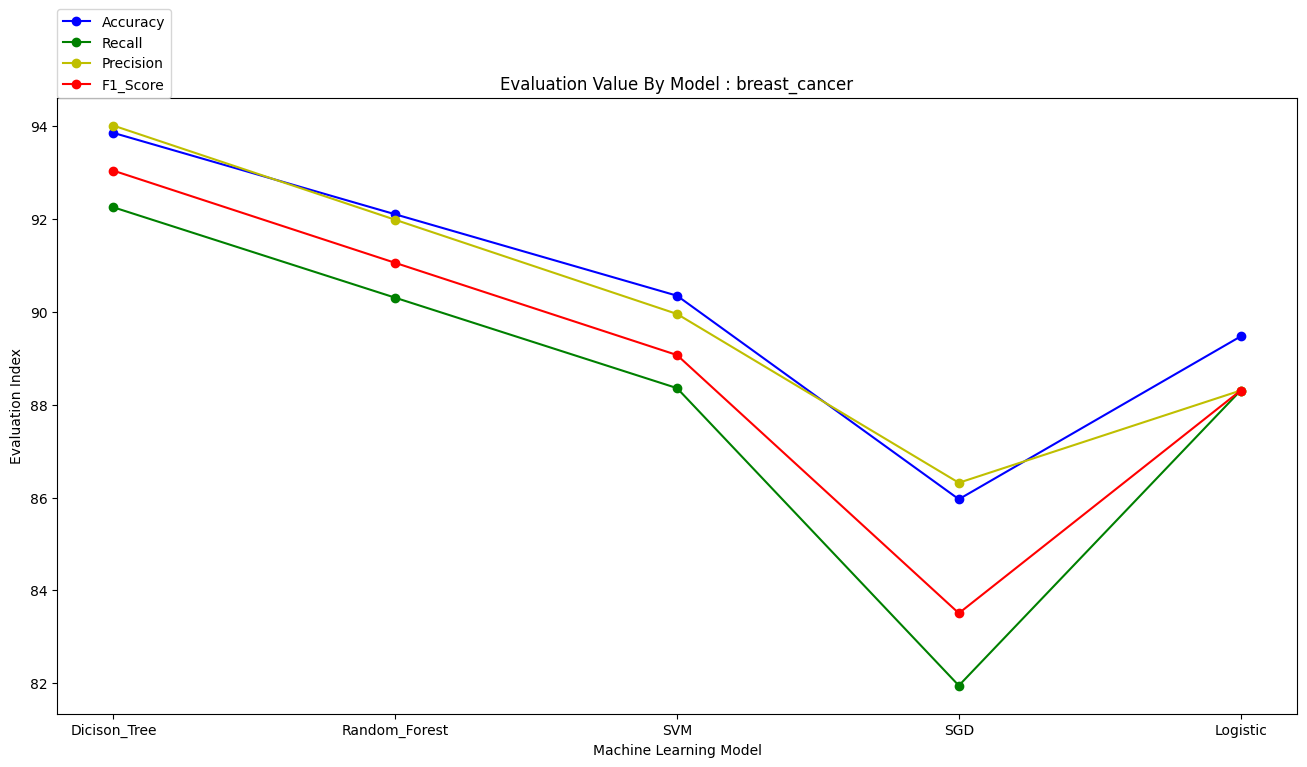

In [110]:
e_x = ['Dicison_Tree', 'Random_Forest', 'SVM', 'SGD', 'Logistic']
e_v = [accuracy * 100, accuracy_r * 100, accuracy_v * 100, accuracy_s * 100, accuracy_l * 100]
e_v_r = [recall * 100, recall_r * 100, recall_v * 100, recall_s * 100, recall_l * 100]
e_v_s = [precision * 100, precision_r * 100, precision_v * 100, precision_s * 100, precision_l * 100]
e_v_l = [fscore * 100, fscore_r * 100, fscore_v * 100, fscore_s * 100, fscore_l * 100]

plt.figure(figsize = (16, 8))
plt.plot(e_x, e_v, 'bo-', label = 'Accuracy')
plt.plot(e_x, e_v_r, 'bo-', color = 'green', label = 'Recall')
plt.plot(e_x, e_v_s, 'bo-', color = 'y', label = 'Precision')
plt.plot(e_x, e_v_l, 'bo-', color = 'red', label = 'F1_Score')
plt.title('Evaluation Value By Model : breast_cancer')
plt.xlabel('Machine Learning Model')
plt.ylabel('Evaluation Index')
plt.legend(loc = (0, 1.0))
plt.show()

## (6) 모델을 평가해 보기  


4가지의 분류모델에서 평균적으로 accuracy 값이 더 높게 나온게 확인되었습니다.  
실제로 Target_name 에서만 봤을때에도[malignant- 악의있는(유방암 여부o) /benign - 온화한(유방암 여부x)]  
라는 내용으로 확인됐으며 데이터자체로도 어떠한 평가지표보다 직접적인 정확도 평가지표가  
가장 중요한 데이터였으며(데이터 명칭부터 유방암 여부[True or False])  
실제로도 accuracy 평가값이 가장 높게 나온것을 확인할 수 있었습니다.  
  
  
정확도 : 예측이 정답과 얼마나 정확한가?  
정밀도 : 예측한 것중에 정답의 비율은?  
재현율 : 찾아야 할 것중에 실제로 찾은 비율은?  
[F1 Score : 정밀도와 재현율의 평균](https://sumniya.tistory.com/26)  
  


## 참고문헌 Reference  


1. [Classification  - 모델 평가 : precision_score(정밀도), recall_score(재현율), f1_score](https://steadiness-193.tistory.com/267)  
2. [머신러닝 다중 분류 모델 성능평가에서 f1,recall,roc,auc 사용하기](https://magicode.tistory.com/38)  
3. [매크로 평균(Macro-average) vs 마이크로 평균(Micro-average)](https://junklee.tistory.com/116)  
4. [서포트 벡터 머신(Support Vector Machine) 쉽게 이해하기](https://hleecaster.com/ml-svm-concept/)  
5. [matplotlib.pyplot 에 대한 자세한 사용법 (이수연님의 링크)](https://wikidocs.net/92085)  
6. [나융퍼실님의 시각화 관련 도움되는 참고자료 (저장이 안되어서 나머진 날아갔어요...ㅜㅜ 죄송합니다)]  
   [플롯유형](https://matplotlib.org/stable/plot_types/index)  
   [결정나무 시각화](https://rfriend.tistory.com/419)  
   [Bar plot](https://matplotlib.org/stable/gallery/index.html)  
7. [DecisionTree 구현 및 hyper parameter 설정](https://continuous-development.tistory.com/173)  
8. [분류성능평가지표 - Precision(정밀도), Recall(재현율) and Accuracy(정확도)](https://sumniya.tistory.com/26)  
9. [ML_사이킷런 클래스 SGDClassifier : 선형분류](https://codingsmu.tistory.com/97)  
  


## 회고  


이번 프로젝트를 진행하면서 아쉬운점이 많았습니다.  
  
1. 손글씨 데이터(digits)  
손글씨 데이터(digits)의 경우 이미지로 되어있는걸 확인하여 이미지의 픽셀값을 활용해서  
더 정확하게 비교분석 해보고 싶었으나... 아직은 실력이 많이 부족하여 기존 데이터분류와 크게 벗어나지 않는  
방식에서 모델별로 학습을 시킨 뒤 평가지표 확인 그리고 시각화 에서 이번 프로젝트를 마쳤으며  
여러가지 사용할 수 있는 데이터가 있음에도 사용하지 못한 부분에 대해서는 나중에 가서라도  
꼭 이용하고 싶다는 생각을 하게끔 만든 데이터셋이었습니다. (이미지를 활용하는 방법과 시각화 하는 방법에 대해서  
가장 시간을 많이 쓴 데이터셋이며 시각화는 아직은 미흡하지만 생각했던만큼 진행이 됐으나 이미지활용법에 대해선  
전혀 진전이 없었으며.. 기회가 된다면 나중에 꼭 다시 다뤄보고 싶은 데이터셋이라고 생각듭니다.)  
  
2. 와인분류 데이터(wine)  
손글씨 데이터에서 시간을 많이 소모해서 자세하게 뜯어보지 못한 데이터셋입니다.  
(3번에서 나올 유방암여부 데이터셋도 동일...)  
그리고 평가모델중에 SGD 의 값이 세가지 데이터셋중에 평가지표값이 제일 들쑥날쑥했으며  
SGD 모델에 대해서 여러가지를 찾아보게끔 해줬던 데이터셋입니다. 결과적으론 해결하지 못하고 넘어간 부분이고  
아직까지도 그 이유에 대해서는 이해를 하질 못하고 있으며 SGD 모델의 파라미터값에 대해서  
어떤식으로 튜닝을 해야하는지 더 찾아봐야겠다고 느끼게 해줬던 데이터셋이었습니다.  
  
3. 유방암 여부 데이터(breast_cancer)  
데이터셋을 확인할때 Target_name 을 print 했을 때 나온 ['malignant', 'benign'] 을 보고  
진행했던 세가지 프로젝트 중 어떤 모델을 쓰는게 더 데이터셋을 잘 활용하는것이며  
평가지표값이 어떤게 나와야 더 좋겠구나 라고 확신을 줬던 데이터셋이었습니다.  
실제 모델에 결과값에 대해서도 생각하고 있었던 Decision_tree 에 대한 모델값이 제일 높게 나왔고  
(유방암 여부는 데이터셋을 비교하여 True/False 정확하게 나눠야기에 Decision_tree 를 생각하고 있었습니다)  
모델 평가지표값을 비교해서 봤을때도 accuracy 값이 가장 높게 나왔었으며  
(SGD 모델값에 대해선 평가지표값 마저 들쑥날쑥하여 논외)  
데이터셋에 대해서 어느정도 이해를 하고 있었다고 개인적으로 느끼게 해준 데이터셋이었습니다.  
  
마지막으로 지금까지 공부해왔던 내용에 대해서 어느정도 이해를 하고 넘어갔다고 생각을 하고 있었으나  
직접 프로젝트를 진행해봄으로써 이해하고 있다고 생각했던 내용의 절반 이상은 제대로 이해하고 있었던것이  
아니었으며 프로젝트 진행에도 이전 LMS 열어 확인 후 진행+구글링 검색으로 겨우겨우 완성? 시킨것을 보면  
아직 공부할길이 멀다고 느끼게 해준 첫 프로젝트였습니다.  
그러나 이번 프로젝트에서 느낀 가장 큰것은 각 데이터마다 어떤식으로 분류하고 활용해야하며  
분류했던 데이터를 시각화 작업을 통해서 눈으로 보기 쉽게끔 만드는것이 얼마나 중요한지를 알게 됐습니다.  
(직접적으로 눈으로 보면서 모델별 평가지표값을 비교할 수 있어서 좋았습니다.[SGD 모델 빼고...])  
이제 앞으로 공부해야할 내용이 지금보다 훨씬 더 많아지겠지만 개인적인 욕심으로  
이번 프로젝트보다 훨씬 더 발전된 방향으로 다음 프로젝트를 완성시키고 싶다고 느끼게 해준 첫 프로젝트였으며  
나중에 꼭 다시 한번 더 동일한 데이터셋으로 모델의 튜닝 및 시각화를 진행해야겠다 생각하며  
저의 첫 프로젝트에 대한 회고를 이상으로 마무리 하겠습니다.  
  
첫 프로젝트를 마무리 할 수 있게 도와주신 퍼실님, 그리고 그루분들에게 감사인사드립니다.